# VASCA result analysis example TDS
Example notebook to have a look at the results of 'vasca_pipe -cfg ../vasca_cfg.yaml' from the examples folder. The output of the pipline was stored in the folder vasca_pipeline. Enter the region to be analysed below (assumes to contain the field PS_ELAISN1_MOS15)

In [1]:
region_name = "TDS_ELAISN1" #

### Basic region information

In [2]:
# General path setup and library loading
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

from jdaviz import Imviz
from astropy.coordinates import SkyCoord, match_coordinates_sky
from astropy import units as uu
from astropy.table import Table
from astropy.io import fits


from loguru import logger

from vasca.region import Region
from vasca.field import BaseField
import vasca.visualization as vvis
from vasca.utils import mag2flux

region_fname = "./vasca_pipeline/"+region_name+"/region_"+region_name+".fits"

rg = Region()
rg.load_from_fits(region_fname)
display(rg.tt_fields)
sel_srcs = rg.tt_sources["sel"]
display(rg.tt_sources[sel_srcs])
#rg.info() # Show available tables

field_id,field_name,ra,dec,observatory,obs_filter,fov_diam,sel,nr_vis,time_bin_size_sum,time_start,time_stop,rg_fd_id
,,deg,deg,,,deg,,,s,d,d,
bytes22,bytes22,float64,float64,bytes22,bytes8,float32,bool,int32,float32,float64,float64,int32
GNU2597664528044916736,PS_ELAISN1_MOS15,242.396514585217,53.9999872930018,GALEX,NUV,1.2,True,22,28044.65,54960.52040509259,56810.67461805556,0
GFU2597664528044916736,PS_ELAISN1_MOS15,242.396514585217,53.9999872930018,GALEX,FUV,1.2,True,22,6977.0,54960.52040509259,55722.67461805556,1


fd_src_id,nr_det,ra,dec,pos_err,pos_nxv,pos_var,pos_cpval,pos_rchiq,assoc_id,assoc_dist,obs_filter_id,sel,flux,flux_err,flux_nxv,flux_var,flux_cpval,flux_rchiq,assoc_ffactor,assoc_fdiff_s2n,rg_fd_id,rg_src_id,nr_fd_srcs
,,deg,deg,arcsec,,arcsec2,,,,arcsec,,,1e-06 Jy,1e-06 Jy,,1e-12 Jy2,,,,,,,
int32,int32[2],float64,float64,float32,float32,float32,float32,float32,int64,float32,int32[2],bool,float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],int32,int32,int32
-1,20 .. 5,243.05227422162352,54.160234057691774,0.11356861,-2.9695775e-12,0.29308897,0.13005736,0.8884088,316,0.21568136,1 .. 2,True,46.247955 .. 4.004922,0.31875554 .. 0.348483,0.05179921 .. -0.005974593,112.92398 .. 0.5352211,0.0 .. 0.4626829,46.34236 .. 0.9002588,0.94759876 .. 1.0106717,-6.1571875 .. 0.08707751,-1,122,2
-1,22 .. 2,242.8745303992782,53.72949675776912,0.10792991,-2.3172124e-12,0.21668516,0.41512427,0.77254933,663,0.07468708,1 .. 2,True,52.835796 .. 3.717303,0.31813782 .. 0.53026646,0.28350818 .. 0.1043394,794.0746 .. 2.0284483,0.0 .. 0.06295877,259.99283 .. 3.4576755,0.8518579 .. 1.6846579,-21.156664 .. 2.5006056,-1,278,2
-1,20 .. 5,242.8394356493509,54.212826080510766,0.11786679,-2.8405529e-12,0.18816718,0.9424832,0.51242006,739,0.05783074,1 .. 2,True,30.244444 .. 23.044836,0.28060347 .. 0.6950352,0.0065095364 .. -0.0042340085,7.573545 .. 0.19426379,2.2560792e-08 .. 0.98760337,3.8760383 .. 0.08318669,1.0034976 .. 0.9894096,0.28434032 .. -0.25895533,-1,315,2
-1,22 .. 5,242.80399022543972,54.058493575196096,0.11529838,-1.9333706e-12,0.49724966,0.0013089622,1.309508,807,0.22833565,1 .. 2,True,31.187725 .. 10.016344,0.27499792 .. 0.4769453,0.08579489 .. -0.0015988306,85.22281 .. 0.9849012,0.0 .. 0.48712862,39.192688 .. 0.8598885,0.9551618 .. 0.98734266,-3.955279 .. -0.19579014,-1,338,2
-1,21 .. 5,242.77004347390644,53.83216226486246,0.12206503,3.1311206e-12,0.5220277,0.012474193,1.3101124,865,0.48287684,1 .. 2,True,34.399822 .. 19.620687,0.31365457 .. 0.65622693,0.1758777 .. 0.0009905585,210.33818 .. 2.5717535,0.0 .. 0.30038562,75.711105 .. 1.2187026,0.97673184 .. 0.9709042,-1.9839559 .. -0.6478337,-1,360,2
-1,21 .. 5,242.70742055775864,53.749692785674206,0.12274878,-2.4939406e-12,0.622377,3.128441e-05,1.5280088,984,0.23195833,1 .. 2,True,24.80771 .. 6.605185,0.2653101 .. 0.43467385,0.01671371 .. 0.0010369906,11.805147 .. 1.0121342,3.9764714e-27 .. 0.37215936,8.843381 .. 1.0646077,0.9771421 .. 0.94493437,-1.6177248 .. -0.6199406,-1,412,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1,21 .. -1,242.04726966103746,54.347517505684145,0.13353884,-2.5001804e-12,0.24383828,0.7354206,0.6319471,13525,0.18723482,1 .. -1,True,14.678253 .. -1.0,0.20915544 .. -1.0,0.052137285 .. -100.0,12.182048 .. -1.0,2.2e-44 .. -1.0,13.172651 .. -1.0,0.9644031 .. 1.0,-1.8737687 .. 0.0,-1,4799,1


### Basic info source TDE PS1-10jh

Found VASCA source is at distance: 0.00029806148194153997 deg


field_id,field_name,ra,dec,observatory,obs_filter,fov_diam,sel,nr_vis,time_bin_size_sum,time_start,time_stop,rg_fd_id,fd_src_id
,,deg,deg,,,deg,,,s,d,d,,
bytes22,bytes22,float64,float64,bytes22,bytes8,float32,bool,int32,float32,float64,float64,int32,int32[1]
GNU2597664528044916736,PS_ELAISN1_MOS15,242.396514585217,53.9999872930018,GALEX,NUV,1.2,True,22,28044.65,54960.52040509259,56810.67461805556,0,1679


fd_src_id,nr_det,ra,dec,pos_err,pos_nxv,pos_var,pos_cpval,pos_rchiq,assoc_id,assoc_dist,obs_filter_id,sel,flux,flux_err,flux_nxv,flux_var,flux_cpval,flux_rchiq,assoc_ffactor,assoc_fdiff_s2n,rg_fd_id,rg_src_id,nr_fd_srcs
,,deg,deg,arcsec,,arcsec2,,,,arcsec,,,1e-06 Jy,1e-06 Jy,,1e-12 Jy2,,,,,,,
int32,int32[2],float64,float64,float32,float32,float32,float32,float32,int64,float32,int32[2],bool,float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],float32[2],int32,int32,int32
-1,9 .. -1,242.36799405563582,53.673492807470396,0.21433103,-3.5976873e-12,0.32065862,0.32529438,0.7639206,10469,0.17213278,1 .. -1,True,7.9562874 .. -1.0,0.26963854 .. -1.0,10.7397785 .. -100.0,680.8981 .. -1.0,0.0 .. -1.0,297.64703 .. -1.0,1.0412223 .. 1.0,0.98138565 .. 0.0,-1,3735,1


vis_id,fd_src_id,ra,dec,pos_err,flux,flux_err,s2n,obs_filter_id,sel,rg_fd_id,rg_src_id
,,deg,deg,arcsec,1e-06 Jy,1e-06 Jy,,,,,
int64,int32,float64,float64,float32,float32,float32,float32,int32,bool,int32,int32
2597664391277051904,1679,242.36793383819526,53.673376313246045,0.6901429,5.0972424,0.8218123,6.2024417,1,True,0,3735
2597664391075725312,1679,242.3681994542763,53.67353780851961,0.5,71.79415,1.696767,42.31232,1,True,0,3735
2597664390975062016,1679,242.36807120218452,53.67364529001413,0.5255185,54.91735,1.6375269,33.536762,1,True,0,3735
2597664391209943040,1679,242.36794187408043,53.67332903707245,0.7006945,5.9253736,0.75601786,7.8376107,1,True,0,3735
2597664391142834176,1679,242.3678646423442,53.67336978366317,0.6912552,5.4714675,0.69646895,7.8560104,1,True,0,3735
2597664391243497472,1679,242.36809043633627,53.673386801808135,0.6797218,5.6501956,0.7712134,7.326371,1,True,0,3735
2597664391176388608,1679,242.3678701766545,53.67354550274539,0.68921536,6.193512,0.7272987,8.515776,1,True,0,3735
2597664391109279744,1679,242.3676087982485,53.67350456522766,0.6748421,4.4393206,0.7365625,6.0270796,1,True,0,3735


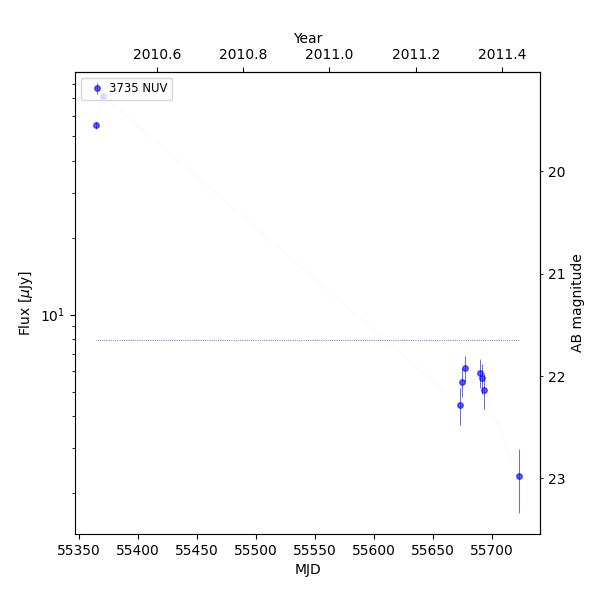

In [3]:
# αJ2000 = 16h09min28.296s, δJ2000 = +53 deg 40′ 23.52′′ from arXiv:1205.0252 in field "GNU2597664528044916736"
#logger.enable("vasca")

src_ps1tde, dist = rg.get_src_from_sky_pos('16h09m28.296s', '+53d40m23.52s')
print("Found VASCA source is at distance:",dist.degree,"deg")

fig_lc, ax_lc = vvis.plot_light_curve(src_ps1tde,rg_src_ids=src_ps1tde.tt_sources["rg_src_id"][0])
display(src_ps1tde.tt_fields)
display(src_ps1tde.tt_sources)
display(src_ps1tde.tt_detections)

### Display TDE PS1-10jh field in the sky

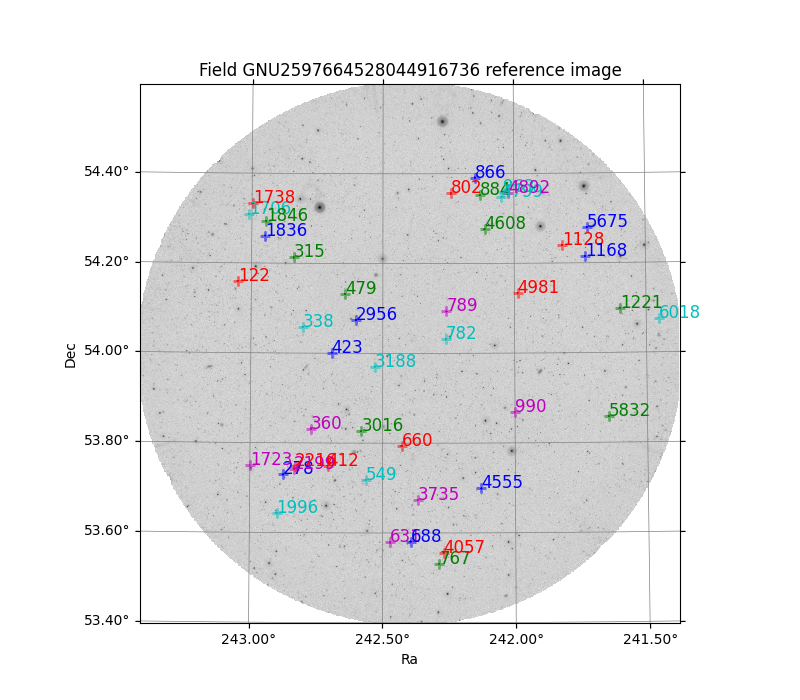

In [4]:
fd = rg.get_field(field_id=src_ps1tde.tt_fields[0]["field_id"], load_method="FITS", add_field=True)
fd_src_id = src_ps1tde.tt_fields["fd_src_id"][0]

fig, ax = vvis.plot_field_sky_map(fd, img_idx=-1, sky_region = fd.get_sky_region()) # 
ax = vvis.plot_sky_sources(rg.tt_sources,tt_det=rg.tt_detections, sky_region_wcs = (fd.get_sky_region(),fd.ref_wcs)) # 
#display(Table(fd.tt_sources[src_idx]))

### Show TDS coverage maps

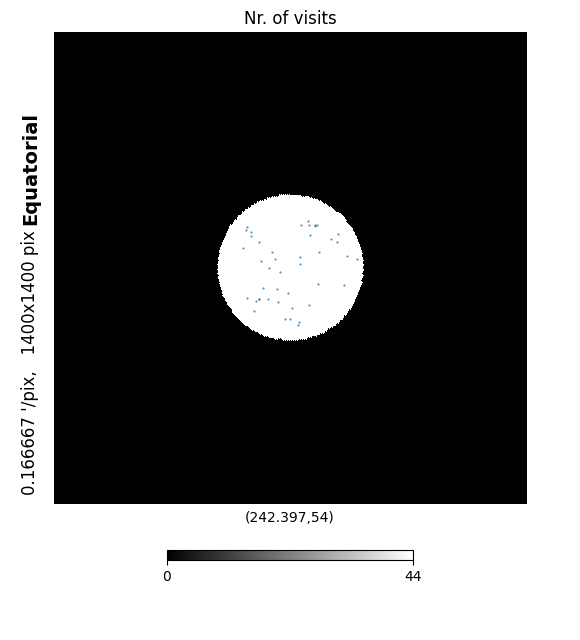

In [5]:
#logger.enable("vasca")
plot_coverage = True
if plot_coverage:
    rg.add_coverage_hp(nside=4096, coord_sys="icrs")
    #vvis.plot_region_sky_mollview(rg, var="nr_vis")
    #vvis.plot_region_sky_mollview(rg, var="nr_fds")
    #vvis.plot_region_sky_mollview(rg, var="exp")
    #rg.add_coverage_hp(nside=4096, )
    vvis.plot_region_sky_gnomeview(rg,rg.tt_fields[0]["ra"],rg.tt_fields[0]["dec"])
    #vvis.plot_region_sky_mollview(rg)

### Sky image with Imviz, show source and detection markers on-top

In [6]:
show_imviz = False
if show_imviz:
    hdup = fits.PrimaryHDU(fd.ref_img, header=fd.ref_wcs.to_header())
    imviz = Imviz()
    viewer = imviz.default_viewer
    imviz.load_data(hdup, data_label=str(field_id))
    imviz.show(loc='sidecar')

    sel_det = fd.tt_detections["sel"]
    tt_det_sky = Table({'coord': SkyCoord(fd.tt_detections[sel_det]["ra"], fd.tt_detections[sel_det]["dec"], frame='fk5')})
    viewer.marker = {'color':'blue', 'markersize': 5., 'fill': False} #, 'alpha': 1.0
    viewer.add_markers(tt_det_sky, use_skycoord=True, marker_name='D')

    srcs_sky = SkyCoord(fd.tt_sources["ra"], fd.tt_sources["dec"], frame='fk5')
    tt_srcs_sky = Table({'coord':srcs_sky })
    viewer.marker = {'color':'red', 'markersize': 2., 'fill': True} #, 'alpha': 1.0
    viewer.add_markers(tt_srcs_sky, use_skycoord=True, marker_name='S')